In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
from tkinter import filedialog

In [2]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=False, title='load spiketimes csv')

%gui tk

In [3]:
df = pd.read_csv(infiles).iloc[:, 1:]

In [8]:
print(f'these are the neuron IDs {list(df.keys())}')

these are the neuron IDs ['neuron 656', 'neuron 660', 'neuron 661', 'neuron 662', 'neuron 663', 'neuron 664', 'neuron 665', 'neuron 667', 'neuron 675', 'neuron 676', 'neuron 677', 'neuron 678', 'neuron 680', 'neuron 681', 'neuron 683', 'neuron 684', 'neuron 686', 'neuron 687', 'neuron 690', 'neuron 691', 'neuron 692', 'neuron 693', 'neuron 694', 'neuron 699', 'neuron 700', 'neuron 701', 'neuron 702', 'neuron 703', 'neuron 704', 'neuron 706', 'neuron 707', 'neuron 708', 'neuron 711', 'neuron 712', 'neuron 713', 'neuron 714', 'neuron 715', 'neuron 718', 'neuron 719', 'neuron 720', 'neuron 721', 'neuron 724', 'neuron 731', 'neuron 734', 'neuron 736', 'neuron 744', 'neuron 745', 'neuron 746', 'neuron 747', 'neuron 748', 'neuron 750', 'neuron 753']


In [46]:
np.max(df.max())

16345.816933333334

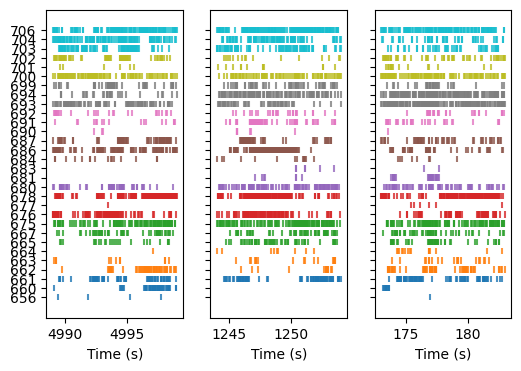

In [58]:
# first 10 neurons rasters, up to first 10 seconds
neurons = 30
time_bin = 10
R = np.linspace(0, 1, neurons)
colorCodes = plt.cm.tab10(R)
lineSizes = 0.7 * np.ones((neurons, ))
examples = 3
np.random.seed(2022)
chosen_ex = np.random.choice(np.arange(np.max(df.max())-time_bin), examples)
fig, ax = plt.subplots(1, examples, figsize=(6, 4), sharey=True)

for ex in range(examples):
    neuralData = []
    for neuron in range(neurons):
        neuralData.append(df[(df[list(df.keys())[neuron]] >= chosen_ex[ex]) & 
                             (df[list(df.keys())[neuron]] <= chosen_ex[ex] + time_bin)][list(df.keys())[neuron]])
    
    ax[ex].eventplot(neuralData, colors=colorCodes, linelengths=lineSizes, alpha=0.8)
    ax[ex].set_xlabel('Time (s)')
    # if ex == 0:
        # ax[ex].set_ylabel('Neuron #')
    ax[ex].set_yticks(np.arange(neurons))
    ax[ex].set_yticklabels([list(df.keys())[n].rpartition(' ')[2] for n in range(neurons)])

plt.show()
fig.savefig('../temp_figs/example_raster.png', dpi=300)